In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import datetime

### Exploratory Data Analysis 

In [72]:
customer = pd.read_csv("D:\Python Case Study\Case Study 1 - Retail Case Study\Customer.csv")
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [74]:
prod_info = pd.read_csv("D:\Python Case Study\Case Study 1 - Retail Case Study\prod_cat_info.csv")
prod_info.head()


,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [76]:
transaction = pd.read_csv("D:\Python Case Study\Case Study 1 - Retail Case Study\Transactions.csv")
transaction.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [86]:
print(customer.shape)
print(prod_info.shape)
print(transaction.shape)

(5647, 4)
(23, 4)
(23053, 10)


In [100]:
print(customer.info())
print(prod_info.info())
print(transaction.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 868.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column         

In [94]:
print(customer.describe())
print(prod_info.describe())
print(transaction.describe())

         customer_Id    city_code
count    5647.000000  5645.000000
mean   271037.281034     5.472631
std      2451.261711     2.859918
min    266783.000000     1.000000
25%    268912.000000     3.000000
50%    271028.000000     5.000000
75%    273180.000000     8.000000
max    275265.000000    10.000000
       prod_cat_code  prod_sub_cat_code
count      23.000000          23.000000
mean        3.739130           6.130435
std         1.711389           3.805550
min         1.000000           1.000000
25%         2.500000           3.000000
50%         4.000000           5.000000
75%         5.000000          10.000000
max         6.000000          12.000000
       transaction_id        cust_id  prod_subcat_code  prod_cat_code  \
count    2.305300e+04   23053.000000      23053.000000   23053.000000   
mean     5.007348e+10  271021.746497          6.149091       3.763632   
std      2.898194e+10    2431.692059          3.726372       1.677016   
min      3.268991e+06  266783.000000      

In [96]:
print(customer.nunique())
print(prod_info.nunique())
print(transaction.nunique())

customer_Id    5647
DOB            4056
Gender            2
city_code        10
dtype: int64
prod_cat_code         6
prod_cat              6
prod_sub_cat_code    12
prod_subcat          18
dtype: int64
transaction_id      20878
cust_id              5506
tran_date            1129
prod_subcat_code       12
prod_cat_code           6
Qty                    10
Rate                 2551
Tax                  4194
total_amt            5764
Store_type              4
dtype: int64


In [102]:
print(customer.value_counts())
print(prod_info.value_counts())
print(transaction.value_counts())

customer_Id  DOB         Gender  city_code
266783       01-05-1974  M       4.0          1
272632       16-01-1978  M       8.0          1
272462       02-01-1985  F       8.0          1
272461       01-12-1974  F       1.0          1
272459       13-08-1973  F       4.0          1
                                             ..
269616       23-06-1972  F       8.0          1
269614       07-01-1987  F       5.0          1
269613       03-01-1979  M       8.0          1
269612       24-10-1988  F       8.0          1
275265       01-01-1990  M       3.0          1
Name: count, Length: 5643, dtype: int64
prod_cat_code  prod_cat          prod_sub_cat_code  prod_subcat        
1              Clothing          1                  Women                  1
4              Bags              4                  Women                  1
6              Home and kitchen  11                 Bath                   1
                                 10                 Kitchen                1
         

### Ques1 : Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done          transactions with us and select the join type accordingly.

In [9]:
Customer_Final = (transaction.rename(columns={'cust_id':'customer_Id'}).merge(customer, on='customer_Id', how='left')
            .merge(prod_info.rename(columns={'prod_sub_cat_code': 'prod_subcat_code'}), on=["prod_cat_code", "prod_subcat_code"], 
                   how='left'))
Customer_Final.head()

NameError: name 'transaction' is not defined

### Ques2 :  Prepare a summary report for the merged data set.


#### a. Get the column names and their corresponding data types

In [9]:
Customer_Final.columns

Index(['transaction_id', 'customer_Id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type', 'DOB',
       'Gender', 'city_code', 'prod_cat', 'prod_subcat'],
      dtype='object')

In [10]:
Customer_Final.dtypes

transaction_id        int64
customer_Id           int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
DOB                  object
Gender               object
city_code           float64
prod_cat             object
prod_subcat          object
dtype: object

#### b. Top/Bottom 10 observations¶

In [12]:
Customer_Final.head(10)

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,11-05-1973,F,8.0,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,27-07-1992,M,8.0,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,08-06-1981,M,3.0,Home and kitchen,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,27-07-1992,M,8.0,Books,DIY
5,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop,09-10-1982,F,6.0,Electronics,Personal Appliances
6,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,29-05-1981,M,9.0,Home and kitchen,Bath
7,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,TeleShop,21-04-1971,M,9.0,Home and kitchen,Tools
8,79792372943,275108,22-02-2014,3,1,-3,-908,286.020,-3010.020,MBR,04-11-1971,F,8.0,Clothing,Kids
9,50076728598,269014,21-02-2014,8,3,-4,-581,244.020,-2568.020,e-Shop,27-11-1979,F,3.0,Electronics,Personal Appliances


In [13]:
Customer_Final.tail(10)

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
23043,49882891062,271982,25-01-2011,10,5,4,1330,558.600,5878.600,e-Shop,10-08-1976,M,8.0,Books,Non-Fiction
23044,14787475597,273982,25-01-2011,4,3,5,969,508.725,5353.725,e-Shop,12-10-1991,M,4.0,Electronics,Mobiles
23045,50691119572,273031,25-01-2011,6,5,1,1148,120.540,1268.540,TeleShop,17-01-1980,F,8.0,Books,DIY
23046,40893803228,272049,25-01-2011,11,6,3,1077,339.255,3570.255,e-Shop,28-06-1975,F,6.0,Home and kitchen,Bath
23047,30856003613,266866,25-01-2011,4,2,2,444,93.240,981.240,TeleShop,18-04-1974,M,4.0,Footwear,Kids
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,21-02-1972,M,7.0,Books,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,27-04-1984,M,9.0,Clothing,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,20-06-1976,M,8.0,Home and kitchen,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,22-05-1970,M,2.0,Books,Children
23052,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,15-01-1982,M,1.0,Books,Children


#### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)¶

In [15]:
Customer_Final.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,23053.0,5.007348e+10,2.898194e+10,3268991.000,2.493864e+10,5.009313e+10,7.533000e+10,9.998755e+10
customer_Id,23053.0,2.710217e+05,2.431692e+03,266783.000,2.689350e+05,2.709800e+05,2.731140e+05,2.752650e+05
prod_subcat_code,23053.0,6.149091e+00,3.726372e+00,1.000,3.000000e+00,5.000000e+00,1.000000e+01,1.200000e+01
prod_cat_code,23053.0,3.763632e+00,1.677016e+00,1.000,2.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Qty,23053.0,2.432395e+00,2.268406e+00,-5.000,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
Rate,23053.0,6.363697e+02,6.223635e+02,-1499.000,3.120000e+02,7.100000e+02,1.109000e+03,1.500000e+03
Tax,23053.0,2.486672e+02,1.871778e+02,7.350,9.828000e+01,1.990800e+02,3.657150e+02,7.875000e+02
total_amt,23053.0,2.107308e+03,2.507561e+03,-8270.925,7.624500e+02,1.754740e+03,3.569150e+03,8.287500e+03
city_code,23045.0,5.482534e+00,2.863499e+00,1.000,3.000000e+00,5.000000e+00,8.000000e+00,1.000000e+01


#### d. Frequency tables for all the categorical variables

In [17]:
Customer_Final.loc[:,Customer_Final.dtypes=="object"].describe().T

,count,unique,top,freq
tran_date,23053,1129,13-07-2011,35
Store_type,23053,4,e-Shop,9311
DOB,23053,3987,27-12-1988,32
Gender,23044,2,M,11811
prod_cat,23053,6,Books,6069
prod_subcat,23053,18,Women,3048


### Ques3 : Generate histograms for all continuous variables and frequency bars for categorical variables 

#### Histogram of all continuous variables

In [20]:
conti_customer = Customer_Final.loc[:,['prod_subcat_code','prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt']]
conti_customer

,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
0,1,1,-5,-772,405.300,-4265.300
1,5,3,-5,-1497,785.925,-8270.925
2,6,5,-2,-791,166.110,-1748.110
3,11,6,-3,-1363,429.345,-4518.345
4,6,5,-2,-791,166.110,-1748.110
...,...,...,...,...,...,...
23048,12,5,1,1264,132.720,1396.720
23049,4,1,1,677,71.085,748.085
23050,2,6,4,1052,441.840,4649.840
23051,11,5,3,1142,359.730,3785.730


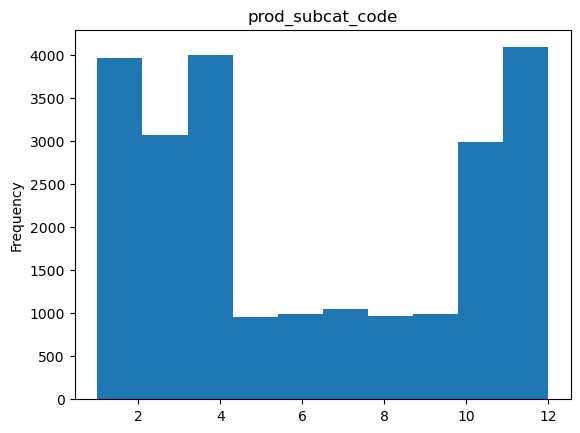

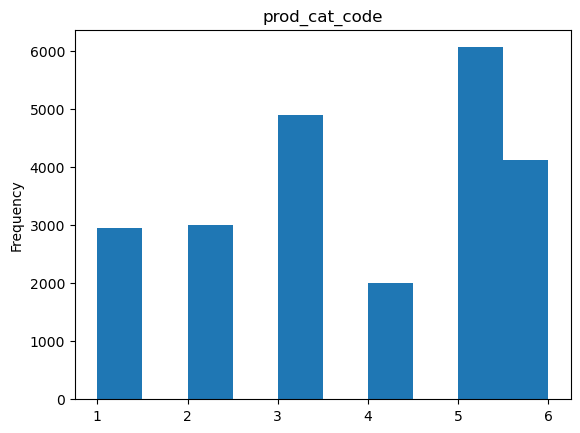

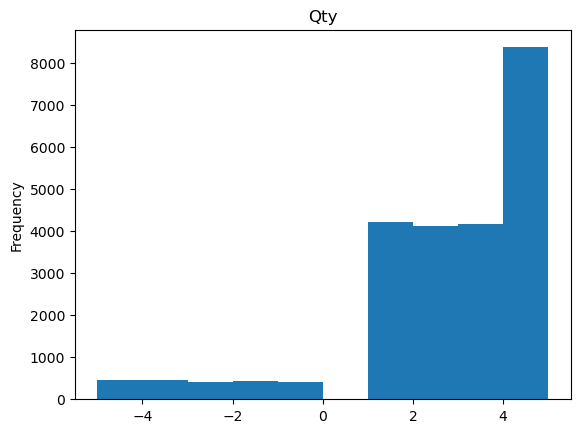

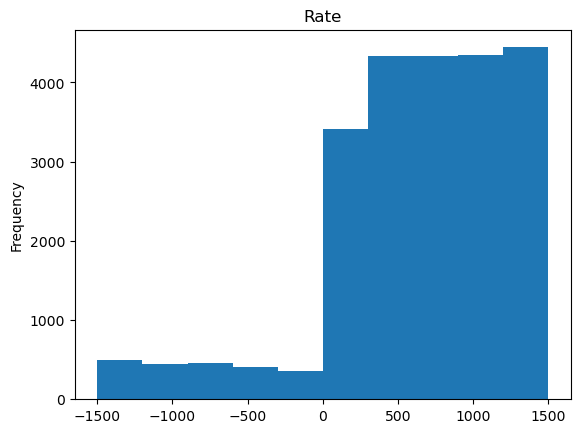

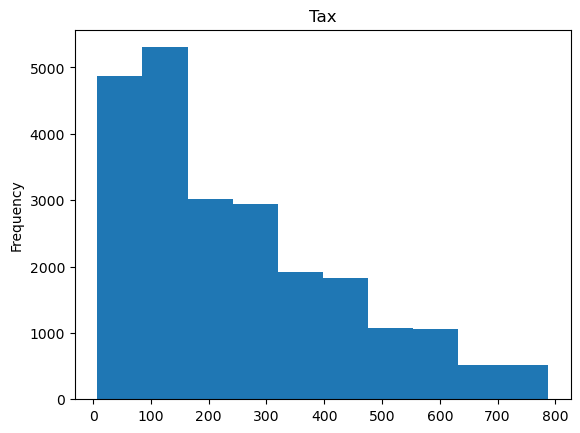

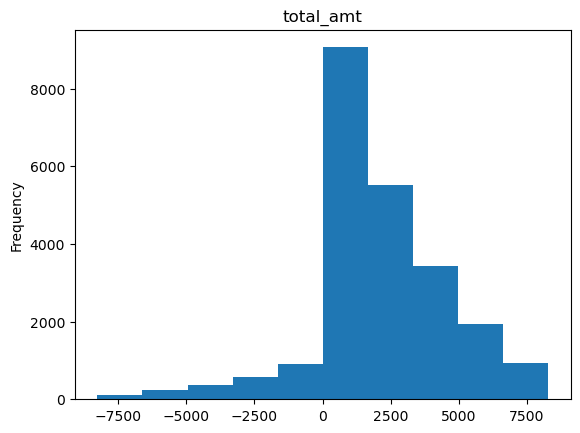

In [21]:
for i in conti_customer.columns:
    conti_customer[i].plot(kind='hist')
    plt.title(i)
    plt.show()

#### Bar chart of categorical variables 

In [23]:
category_customer = Customer_Final.loc[:,Customer_Final.dtypes=='object']
category_customer.head()

,tran_date,Store_type,DOB,Gender,prod_cat,prod_subcat
0,28-02-2014,e-Shop,26-09-1981,M,Clothing,Women
1,27-02-2014,e-Shop,11-05-1973,F,Electronics,Computers
2,24-02-2014,TeleShop,27-07-1992,M,Books,DIY
3,24-02-2014,e-Shop,08-06-1981,M,Home and kitchen,Bath
4,23-02-2014,TeleShop,27-07-1992,M,Books,DIY


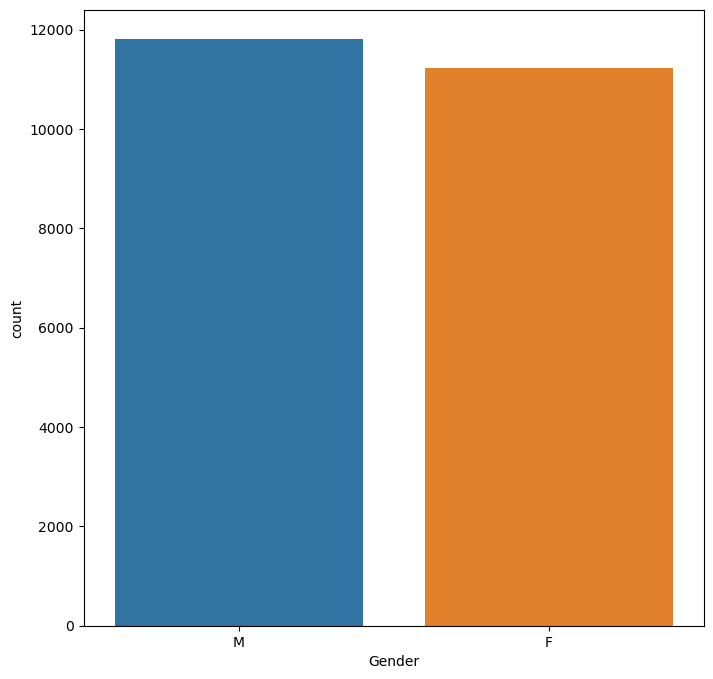

In [24]:
plt.figure(figsize=(8,8))
sns.countplot(x='Gender', data=category_customer)
plt.show()

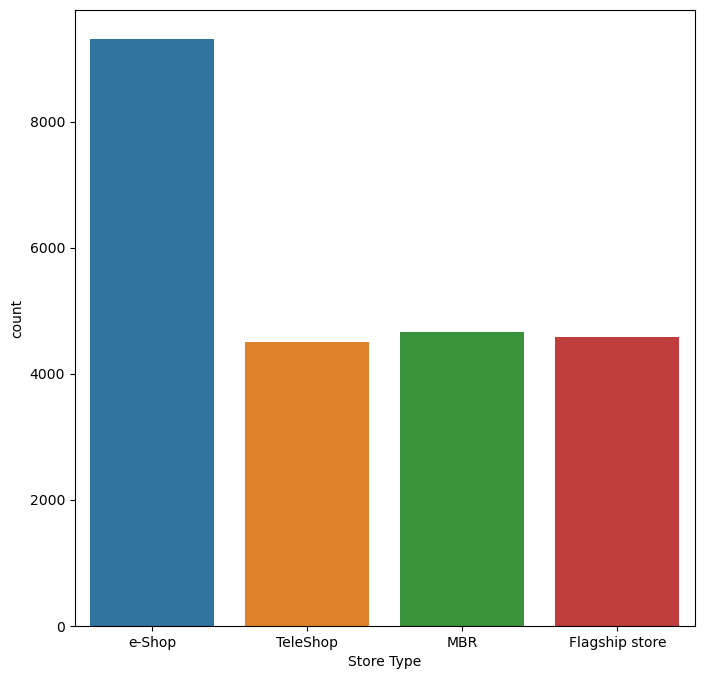

In [25]:
plt.figure(figsize=(8,8))
sns.countplot(x ='Store_type',data=category_customer)
plt.xlabel('Store Type')
plt.show()

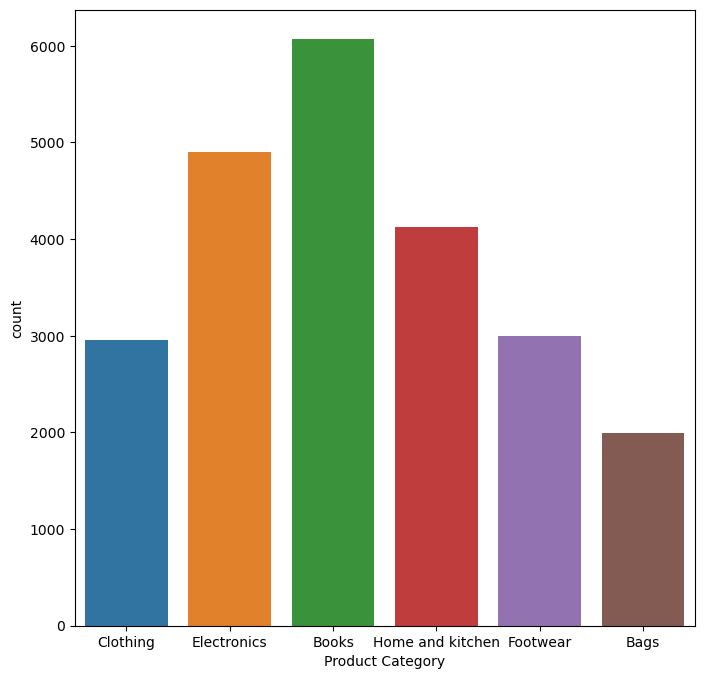

In [26]:
plt.figure(figsize=(8,8))
sns.countplot(x='prod_cat',data=category_customer)
plt.xlabel('Product Category')
plt.show()

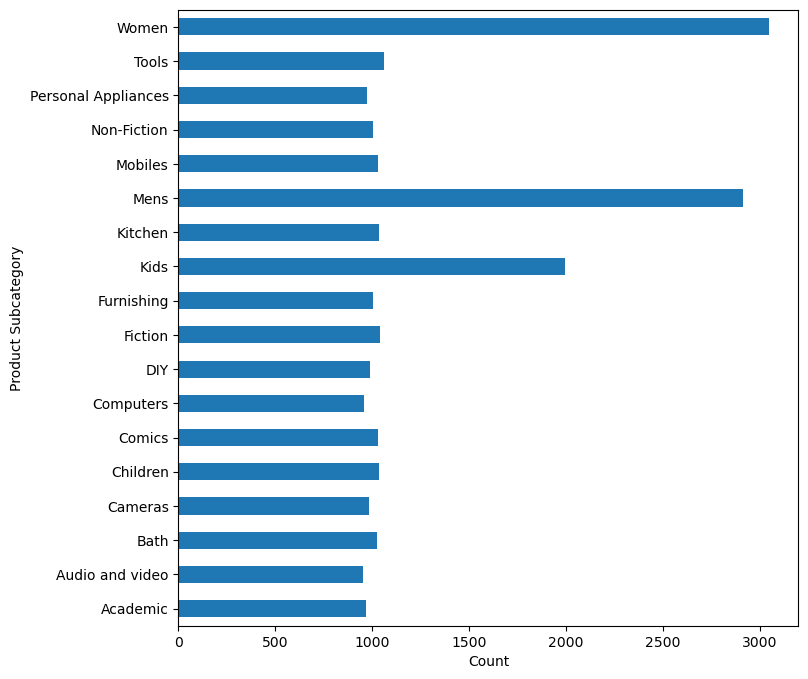

In [27]:
plt.figure(figsize=(8,8))
category_customer.groupby('prod_subcat')['prod_subcat'].count().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Product Subcategory')
plt.show()

### Ques4 : Calculate the following information using the merged dataset  

####  a. Time period of the available transaction data 

In [30]:
Customer_Final.sort_values(by="tran_date").head()

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
16050,47933752822,270192,1/1/2012,3,1,4,215,90.300,950.300,e-Shop,01-06-1987,F,4.0,Clothing,Kids
16052,35798683065,271913,1/1/2012,1,1,1,229,24.045,253.045,MBR,15-10-1985,F,2.0,Clothing,Women
16053,30078154552,269151,1/1/2012,3,2,1,456,47.880,503.880,e-Shop,29-04-1981,F,2.0,Footwear,Women
16054,57039573748,268282,1/1/2012,4,1,1,1024,107.520,1131.520,MBR,22-12-1970,F,1.0,Clothing,Mens
16055,41901986246,269269,1/1/2012,7,5,2,1122,235.620,2479.620,MBR,04-02-1981,M,1.0,Books,Fiction


In [31]:
Customer_Final['tran_date']=Customer_Final['tran_date'].str.replace('/','-')

In [32]:
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'])

min_date = Customer_Final['tran_date'].min()
max_date = Customer_Final['tran_date'].max()

print(f"Time period of the available transaction data is from {min_date.strftime('%d-%m-%Y')} to {max_date.strftime('%d-%m-%Y')}")

Time period of the available transaction data is from 25-01-2011 to 28-02-2014


C:\Users\Gaurav Nailwal\AppData\Local\Temp\ipykernel_9688\834117449.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'])


#### b. Count of transactions where the total amount of transaction was negative 

In [34]:
negative_transaction = Customer_Final.loc[Customer_Final["total_amt"] < 0,"transaction_id"].count()

print("Count of transactions where the total amount of transaction was negative is",negative_transaction)

Count of transactions where the total amount of transaction was negative is 2177


### Ques5 :  Analyze which product categories are more popular among females vs male customers. 

In [36]:
product_gender = Customer_Final.groupby(["Gender","prod_cat"])[["Qty"]].sum().reset_index()
product_gender

,Gender,prod_cat,Qty
0,F,Bags,2362
1,F,Books,7070
2,F,Clothing,3425
3,F,Electronics,5832
4,F,Footwear,3716
5,F,Home and kitchen,4895
6,M,Bags,2346
7,M,Books,7587
8,M,Clothing,3748
9,M,Electronics,6476


### Ques6 : Which City code has the maximum customers and what was the percentage of customers from 
that cit y? 

In [38]:
customer_group = Customer_Final.groupby('city_code')['customer_Id'].count().sort_values(ascending =False)
customer_group

city_code
4.0     2422
3.0     2411
5.0     2360
7.0     2356
10.0    2333
8.0     2330
2.0     2270
1.0     2258
9.0     2178
6.0     2127
Name: customer_Id, dtype: int64

In [39]:
percentage = round((customer_group[4.0] / customer_group.sum()) * 100,2)
percentage

10.51

In [40]:
print("City code 4.0 has the maximum customers and the percentage of customers from that city is ",percentage)

City code 4.0 has the maximum customers and the percentage of customers from that city is  10.51


### Ques7 : Which store type sells the maximum products by value and by quantity? 

In [42]:
Customer_Final.groupby("Store_type")[["Qty", "Rate"]].sum().sort_values(by="Qty", ascending=False)


,Qty,Rate
Store_type,,
e-Shop,22763,5941001
MBR,11194,2953253
Flagship store,11133,2941557
TeleShop,10984,2834420


In [43]:
### e-Shop store sell the maximum products by value and by quantity

### Ques8 : What was the total amount earned from the "Electronics" and "Clothing" categories from 
Flagship Stores 

In [45]:
store_group = round(Customer_Final.pivot_table(index = "prod_cat",columns="Store_type", values="total_amt", aggfunc='sum'),2)
store_group

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.84,848678.68,789181.06,1616300.08
Books,2488205.85,2496039.19,2545005.06,5293443.93
Clothing,1194423.23,1287686.34,1241834.36,2527193.56
Electronics,2215136.04,2107514.56,1973338.84,4426474.20
Footwear,1234806.56,1112163.72,1235719.29,2637084.71
Home and kitchen,1712567.68,1822403.57,1579702.48,3324319.57


In [46]:
# Total amount of both 'Clothing' and 'Electronics' from ' Flagship Store'

store_group.loc[["Clothing","Electronics"],"Flagship store"].sum()

3409559.27

### Ques9 : What was the total amount earned from "Male" customers under the "Electronics" category? 

In [48]:
gender_group = round(Customer_Final.pivot_table(index = "prod_cat",columns="Gender", values="total_amt", aggfunc='sum'),2)
gender_group

Gender,F,M
prod_cat,,
Bags,2077985.65,2046722.99
Books,6164692.24,6645972.78
Clothing,3026750.80,3224079.50
Electronics,5019354.21,5703109.42
Footwear,3202552.99,3014672.05
Home and kitchen,4132177.34,4301075.48


In [49]:
male_earning = gender_group.loc["Electronics","M"]

print("The total amount earned from Male customers under the Electronics category is",male_earning)

The total amount earned from Male customers under the Electronics category is 5703109.42


### Ques10 : How many customers have more than 10 unique transactions, after removing all transactions 
which have any negative amounts? 

In [51]:
positive_trans = Customer_Final.loc[Customer_Final["total_amt"]>0,:]
positive_trans.head()

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
10,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,11-05-1973,F,8.0,Electronics,Computers
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,13-10-1986,M,1.0,Home and kitchen,Tools
12,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop,09-03-1971,M,6.0,Books,DIY
14,36554696014,269345,2014-02-20,3,5,3,1253,394.695,4153.695,e-Shop,26-06-1970,F,10.0,Books,Comics
15,56814940239,268799,2014-02-20,7,5,5,368,193.200,2033.200,e-Shop,27-06-1979,M,9.0,Books,Fiction


In [52]:
unique_trans = positive_trans.groupby(['customer_Id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()
unique_trans

,customer_Id,prod_cat,prod_subcat,transaction_id
0,266783,Books,Non-Fiction,1
1,266783,Clothing,Mens,2
2,266783,Footwear,Mens,1
3,266784,Books,Fiction,1
4,266784,Books,Non-Fiction,1
...,...,...,...,...
19273,275264,Books,Non-Fiction,1
19274,275264,Home and kitchen,Tools,1
19275,275265,Bags,Mens,1
19276,275265,Books,Academic,1


In [53]:
unique_trans_count = unique_trans.groupby('customer_Id')['transaction_id'].count().reset_index()
unique_trans_count.head()

,customer_Id,transaction_id
0,266783,3
1,266784,3
2,266785,5
3,266788,4
4,266794,8


In [54]:
unique_trans_count[unique_trans_count['transaction_id'] > 10]

,customer_Id,transaction_id


In [55]:
#   'There are no unique transactions greater than 10'

### Ques11 :  For all customers aged between 25-35, find out:

##### (a) What was the total amount spent for 'Electronics' and 'Books' product categories? 

In [5]:
Customer_Final['Age'] = (datetime.datetime.now().year - pd.DatetimeIndex(Customer_Final['DOB']).year)
Customer_Final[((Customer_Final.prod_cat == 'Electronics')|(Customer_Final.prod_cat == 'Books')) & ((Customer_Final.Age >= 25) & 
                (Customer_Final.Age <=35))].groupby('prod_cat')['total_amt'].sum().reset_index()


NameError: name 'Customer_Final' is not defined

##### (b) What was the total amount spent by these customers between 1st Jan 2014 to 1st Mar 2014? 

In [67]:
Customer_Final[((pd.to_datetime(Customer_Final.tran_date) >= '2014-01-01')&(pd.to_datetime(Customer_Final.tran_date) <= '2014-03-01')) & 
                                                                ((Customer_Final.Age >= 25) & (Customer_Final.Age <=35))].total_amt.sum()

433343.42999999993